## Predicting Chocolate Bar Ratings

Given *data about chocolate bar*, we need to predict the **type** of chocolate bar.

Data source: https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings

### Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('archive/flavors_of_cacao.csv')
data

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


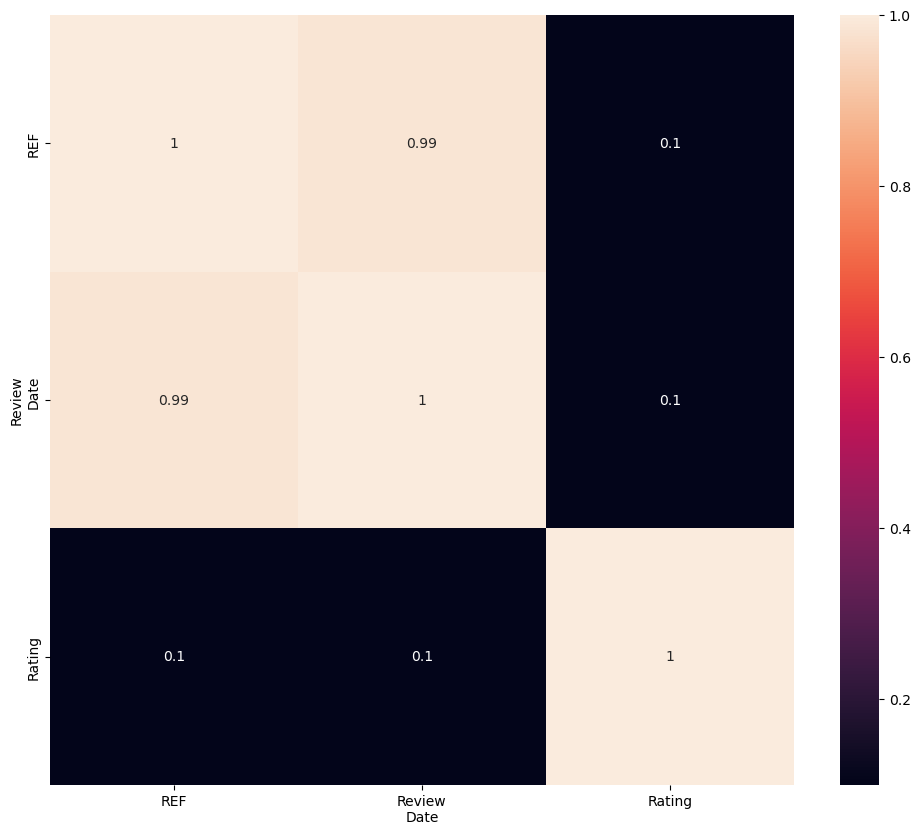

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

In [9]:
data = data.drop(['REF', 'Review\nDate'], axis=1)
data

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,70%,France,2.75,,Togo
2,A. Morin,Atsane,70%,France,3.00,,Togo
3,A. Morin,Akata,70%,France,3.50,,Togo
4,A. Morin,Quilla,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...
1790,Zotter,Peru,70%,Austria,3.75,,Peru
1791,Zotter,Congo,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,62%,Austria,3.25,,India


### Preprocessing

In [11]:
data.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [12]:
data = data.dropna(axis=0).reset_index(drop=True)
data

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,70%,France,2.75,,Togo
2,A. Morin,Atsane,70%,France,3.00,,Togo
3,A. Morin,Akata,70%,France,3.50,,Togo
4,A. Morin,Quilla,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...
1788,Zotter,Peru,70%,Austria,3.75,,Peru
1789,Zotter,Congo,65%,Austria,3.00,Forastero,Congo
1790,Zotter,Kerala State,65%,Austria,3.50,Forastero,India
1791,Zotter,Kerala State,62%,Austria,3.25,,India


In [13]:
data.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           0
Broad Bean\nOrigin                   0
dtype: int64

In [14]:
data.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [17]:
data.columns = ['Company', 'SpecificOrigin',
       'CocoaPercent', 'Location', 'Rating', 'BeanType',
       'BroadOrigin']

In [19]:
data.dtypes

Company            object
SpecificOrigin     object
CocoaPercent       object
Location           object
Rating            float64
BeanType           object
BroadOrigin        object
dtype: object

In [21]:
def removePercents(data):
    return data.apply(lambda x: float(x.strip('%'))/100)

In [24]:
data['CocoaPercent'] = removePercents(data['CocoaPercent'])

In [25]:
data

,Company,SpecificOrigin,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,0.70,France,2.75,,Togo
2,A. Morin,Atsane,0.70,France,3.00,,Togo
3,A. Morin,Akata,0.70,France,3.50,,Togo
4,A. Morin,Quilla,0.70,France,3.50,,Peru
...,...,...,...,...,...,...,...
1788,Zotter,Peru,0.70,Austria,3.75,,Peru
1789,Zotter,Congo,0.65,Austria,3.00,Forastero,Congo
1790,Zotter,Kerala State,0.65,Austria,3.50,Forastero,India
1791,Zotter,Kerala State,0.62,Austria,3.25,,India


In [27]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Company': 416,
 'SpecificOrigin': 1038,
 'Location': 60,
 'BeanType': 41,
 'BroadOrigin': 99}

In [28]:
categorical_features = ['Company', 'SpecificOrigin', 'Location', 'BeanType', 'BroadOrigin']

In [29]:
def onehot_encode(data, columns):
    df = data.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [34]:
data = onehot_encode(data, categorical_features)

In [35]:
y = data['Rating'].copy()
X = data.drop('Rating', axis=1).copy()

In [36]:
X

,CocoaPercent,Company_A. Morin,Company_AMMA,Company_Acalli,Company_Adi,Company_Aequare (Gianduja),Company_Ah Cacao,Company_Akesson's (Pralus),Company_Alain Ducasse,Company_Alexandre,...,BroadOrigin_Venezuela,"BroadOrigin_Venezuela, Carribean","BroadOrigin_Venezuela, Dom. Rep.","BroadOrigin_Venezuela, Ghana","BroadOrigin_Venezuela, Java","BroadOrigin_Venezuela, Trinidad",BroadOrigin_Venezuela/ Ghana,BroadOrigin_Vietnam,BroadOrigin_West Africa,BroadOrigin_
0,0.63,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.70,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.70,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.70,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.70,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,0.70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1789,0.65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1790,0.65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1791,0.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,CocoaPercent,Company_A. Morin,Company_AMMA,Company_Acalli,Company_Adi,Company_Aequare (Gianduja),Company_Ah Cacao,Company_Akesson's (Pralus),Company_Alain Ducasse,Company_Alexandre,...,BroadOrigin_Venezuela,"BroadOrigin_Venezuela, Carribean","BroadOrigin_Venezuela, Dom. Rep.","BroadOrigin_Venezuela, Ghana","BroadOrigin_Venezuela, Java","BroadOrigin_Venezuela, Trinidad",BroadOrigin_Venezuela/ Ghana,BroadOrigin_Vietnam,BroadOrigin_West Africa,BroadOrigin_
0,0.362069,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.482759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.482759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.482759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.482759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,0.482759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1789,0.396552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1790,0.396552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,0.344828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [41]:
inputs = tf.keras.Input(shape=(1655,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [43]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer = optimizer,
    loss = 'mse'
)

In [44]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1655)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        26,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,785 (104.63 KB)

 Trainable params: 26,785 (104.63 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
epochs = 50
batch_size = 32

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = epochs,
    batch_size = batch_size
)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.7117 - val_loss: 6.8869
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1314 - val_loss: 3.1659
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8247 - val_loss: 0.6783
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4026 - val_loss: 0.2921
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2537 - val_loss: 0.2770
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2074 - val_loss: 0.2550
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1768 - val_loss: 0.2480
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1543 - val_loss: 0.2443
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1354 - val_loss: 0.2535
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1202 - val_loss: 0.2382
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1081 - val_loss: 0.2385
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0973 - val_lo

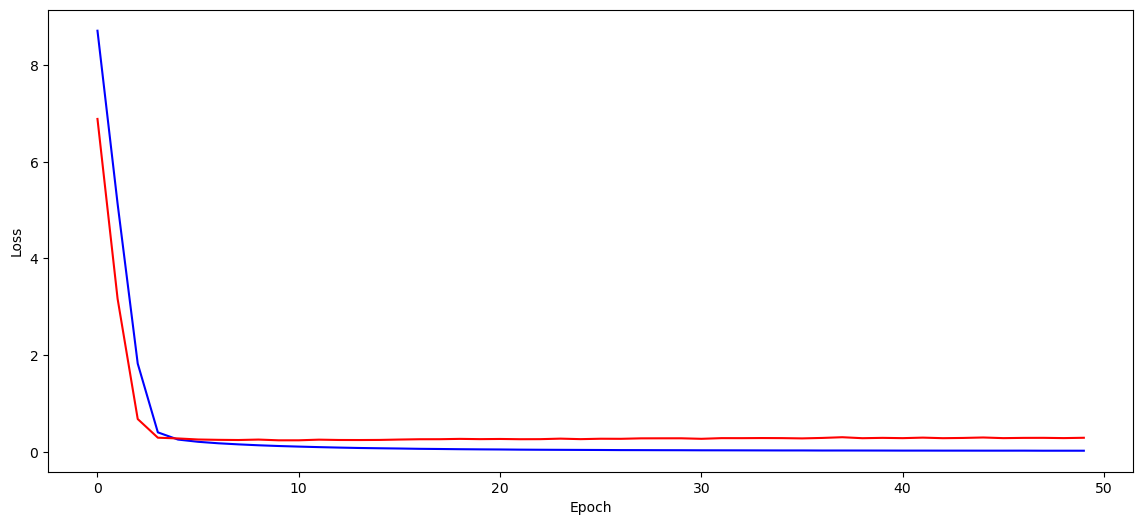

In [51]:
plt.figure(figsize=(14,6))
plt.plot(range(epochs), history.history['loss'], color='b')
plt.plot(range(epochs), history.history['val_loss'], color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [52]:
np.argmin(history.history['val_loss'])

np.int64(9)

In [53]:
model.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3163 


0.3162791430950165